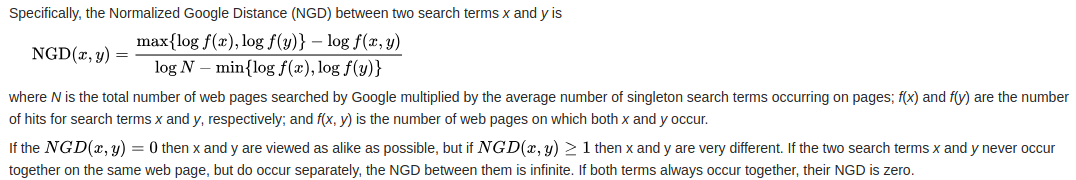

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
WEBPAGES = 130000000000000

In [3]:
w_counts = pd.read_csv('word-count.txt', header=0, sep = " ")

In [4]:
#human similarity from 
human_sim = pd.read_csv('combined.csv', header=0)

In [5]:
#normalised gogle distance
def norm_google_dist(w1, w2, pair):
    result =  ( np.maximum(np.log(w1), np.log(w2))  - np.log(pair))/ (np.log(WEBPAGES) -   np.minimum(np.log(w1), np.log(w2)))
    #result = (np.log(w1) - np.log(pair))/(np.log(WEBPAGES) - np.log(w2))
    return result

In [6]:
#w1 is the word-1  google count, pair is google count with both words combined 
w1 = w_counts['word-1'].values
w2 = w_counts['word-2'].values
pair = w_counts['pair'].values

In [7]:
true_sim = human_sim['Human (mean)'].values

In [8]:
ngd = norm_google_dist(w1, w2, pair)

In [9]:
neg_ngd = -ngd

In [10]:
print("Maximum and Minimum values of ngd(unscaled): ",np.max(ngd), np.min(ngd))

Maximum and Minimum values of ngd(unscaled):  0.4509208250844538 -0.04139331513983677


In [11]:
#scaling of ngd bw 0 and 1
scaled_ngd = (neg_ngd - np.min(neg_ngd))/(np.max(neg_ngd) -np.min(neg_ngd))
#scaling to 0  and 10
scaled_ngd = 10*scaled_ngd

In [12]:
print("Maximum and Minimum values of ngd(scaled): ",np.max(scaled_ngd), np.min(scaled_ngd))

Maximum and Minimum values of ngd(scaled):  10.0 0.0


In [13]:
np.min(true_sim)

0.23

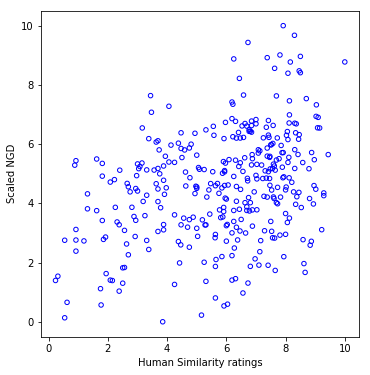

In [14]:
plt.rcParams['figure.figsize'] = [6,6]
plt.scatter(true_sim, scaled_ngd, facecolors='none', s = 20, edgecolors='b')
plt.xlabel("Human Similarity ratings")
plt.ylabel("Scaled NGD")
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('ngd.jpg')